In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('crime_std.csv')
print(df)

    Unnamed: 0    Murder   Assault  UrbanPop      Rape
0            0  0.746988  0.654110  0.440678  0.359173
1            1  0.554217  0.746575  0.271186  0.961240
2            2  0.439759  0.852740  0.813559  0.612403
3            3  0.481928  0.496575  0.305085  0.315245
4            4  0.493976  0.791096  1.000000  0.860465
5            5  0.427711  0.544521  0.779661  0.811370
6            6  0.150602  0.222603  0.762712  0.098191
7            7  0.307229  0.660959  0.677966  0.219638
8            8  0.879518  0.993151  0.813559  0.635659
9            9  1.000000  0.568493  0.474576  0.478036
10          10  0.271084  0.003425  0.864407  0.333333
11          11  0.108434  0.256849  0.372881  0.178295
12          12  0.578313  0.698630  0.864407  0.431525
13          13  0.385542  0.232877  0.559322  0.354005
14          14  0.084337  0.037671  0.423729  0.103359
15          15  0.313253  0.239726  0.576271  0.276486
16          16  0.536145  0.219178  0.338983  0.232558
17        

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [4]:
df.drop(['Murder','Assault'],axis=1,inplace=True)
df.columns

Index(['UrbanPop', 'Rape'], dtype='object')

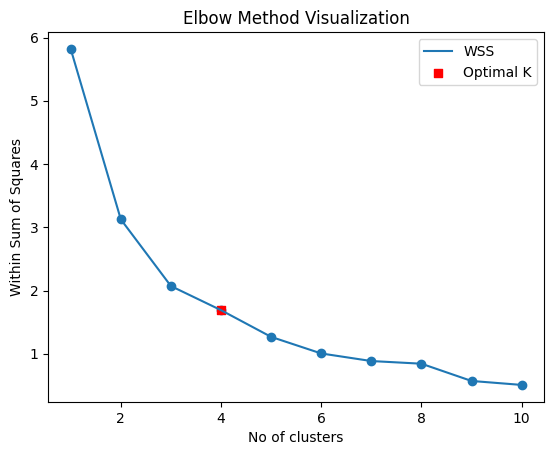

In [7]:
no_of_clusters=np.arange(1,11)

wss=[]

from sklearn.cluster import KMeans

for k in no_of_clusters:
    model=KMeans(n_clusters=k,random_state=12345)
    model.fit(df)
    wss.append(model.inertia_)

plt.plot(no_of_clusters, wss, label="WSS")
plt.scatter(no_of_clusters, wss)
plt.scatter(no_of_clusters[3], wss[3],
            color="red", label="Optimal K", marker="s")
plt.xlabel("No of clusters")
plt.ylabel("Within Sum of Squares")
plt.title("Elbow Method Visualization")
plt.legend()
plt.show()

In [8]:
df.columns

Index(['UrbanPop', 'Rape'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


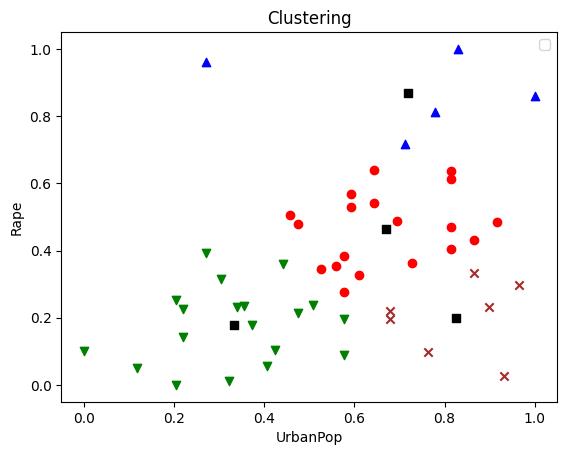

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=12345)
model.fit(df)


colors = ['red', 'green', 'blue', 'brown']
markers = ['o', 'v', '^', 'x']

plt.xlabel("UrbanPop")
plt.ylabel("Rape")
plt.title("Clustering")

for index in range(len(model.cluster_centers_)):
    plt.scatter(
        df['UrbanPop'][model.labels_ == index],
        df['Rape'][model.labels_ == index],
        color=colors[index], marker=markers[index])
    plt.scatter(
        model.cluster_centers_[index][0],
        model.cluster_centers_[index][1],
        color="black", marker="s")

plt.legend()
plt.show()